# Lesson 3: Stationarity and Differencing

In this lesson, we discuss stationarity in time series data and how differencing can help achieve stationarity. We'll also apply the Augmented Dickey-Fuller (ADF) test to evaluate stationarity.

## What is Stationarity?

A time series is **stationary** if its statistical properties—mean, variance, and autocorrelation—do not change over time.

## Testing for Stationarity

We use the Augmented Dickey-Fuller (ADF) test where the null hypothesis states that the series is non-stationary.

## Creating a Non-Stationary Series

We'll create a synthetic non-stationary series using a random walk process.

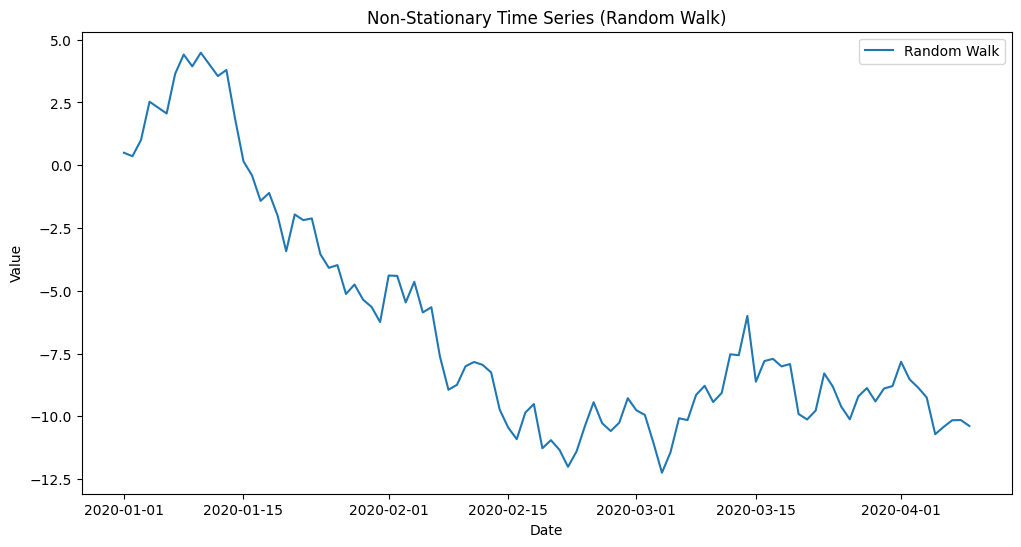

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

# Set seed for reproducibility
np.random.seed(42)

# Generate a random walk (non-stationary series)
n = 100
steps = np.random.normal(loc=0, scale=1, size=n)
random_walk = np.cumsum(steps)

# Create a date range
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')

# Build the DataFrame
df = pd.DataFrame({'Date': dates, 'Value': random_walk}).set_index('Date')

# Plot the non-stationary series
plt.figure(figsize=(12,6))
plt.plot(df, label='Random Walk')
plt.title('Non-Stationary Time Series (Random Walk)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## ADF Test on the Original Series

Let's apply the ADF test to our random walk.

In [2]:
# Perform the ADF test
result = adfuller(df['Value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] < 0.05:
    print('The series is likely stationary.')
else:
    print('The series is likely non-stationary.')

ADF Statistic: -1.358332
p-value: 0.602081
The series is likely non-stationary.


## Differencing to Achieve Stationarity

We compute the first-order difference to remove trends.

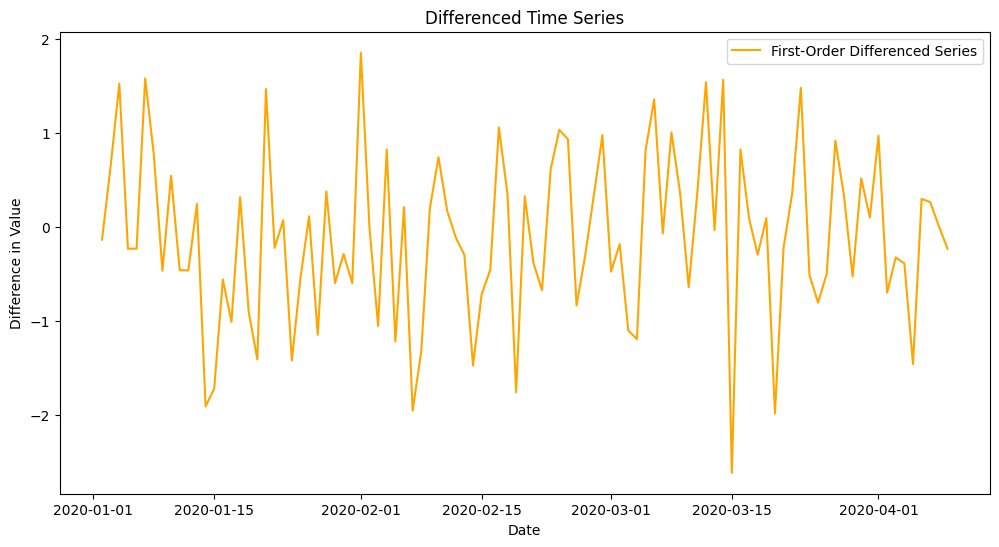

In [3]:
# Compute the first-order difference
df['Value_diff'] = df['Value'].diff()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(df['Value_diff'], label='First-Order Differenced Series', color='orange')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Difference in Value')
plt.legend()
plt.show()

## ADF Test on the Differenced Series

We reapply the ADF test to check if the differenced series is stationary.

In [4]:
# Remove missing values and perform the ADF test
df_diff = df['Value_diff'].dropna()
result_diff = adfuller(df_diff)
print('ADF Statistic (Differenced): %f' % result_diff[0])
print('p-value (Differenced): %f' % result_diff[1])

if result_diff[1] < 0.05:
    print('The differenced series is likely stationary.')
else:
    print('The differenced series is likely non-stationary.')

ADF Statistic (Differenced): -10.008881
p-value (Differenced): 0.000000
The differenced series is likely stationary.


## Conclusion

We explored stationarity and applied differencing to transform a non-stationary series into a stationary one.